<a href="https://colab.research.google.com/github/CharlesPrado23/BCDataScience1T22N/blob/main/Regressao_Linear/Aula_DataWrangling_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/BCDataScience1T22N/main/Pandas%2BDataWrangling/data.csv')
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [2]:
dfClean['Duration'].unique()

array([ 60,  45,  30,  80,  20, 210, 160, 180, 150, 300,  90, 120, 270,
        15,  25,  75])

In [3]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [4]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)
dfClean.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [5]:
### Reset_index #### 
dfClean.reset_index(drop=True,inplace=True)
dfClean.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [6]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [7]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.2 KB


In [8]:
### Tipos de uma coluna #### 
dfClean.Calories.map(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
157    <class 'float'>
158    <class 'float'>
159    <class 'float'>
160    <class 'float'>
161    <class 'float'>
Name: Calories, Length: 162, dtype: object

In [9]:
### Visualiza a coluna Calories #####
dfClean[dfClean.Calories.isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
86,45,107,137,NaN
112,60,105,125,NaN
135,60,97,127,NaN


In [10]:
#### Substituir pela média ##### 
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

277.7870967741935

In [11]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

340.2704225352114

In [12]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==60),'Calories'] = avg_60

In [13]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==45),'Calories'] = avg_45

In [14]:
dfClean[dfClean.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


In [15]:
def multiplica_por_4(a):
  return a*4 

In [16]:
multiplica_por_4(10)

40

In [17]:
mult_por_4 = lambda x:x*4

In [18]:
mult_por_4(10)

40

In [19]:
dfClean['Calories'] =  dfClean.groupby('Duration')['Calories'].apply(lambda x: x.fillna(round(x.mean(),1)))
dfClean['Calories'].head(20)

0     409.100000
1     479.000000
2     340.000000
3     282.400000
4     406.000000
5     300.000000
6     374.000000
7     253.300000
8     195.100000
9     269.000000
10    329.300000
11    250.700000
12    345.300000
13    379.300000
14    275.000000
15    215.200000
16    300.000000
17    277.787097
18    323.000000
19    243.000000
Name: Calories, dtype: float64

In [20]:
dfClean.to_csv('dataClean.csv')

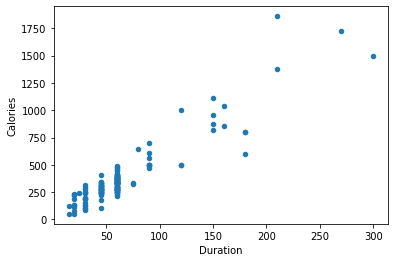

In [21]:
dfClean.plot(kind='scatter', x='Duration', y='Calories')

### Regressão Linear #####



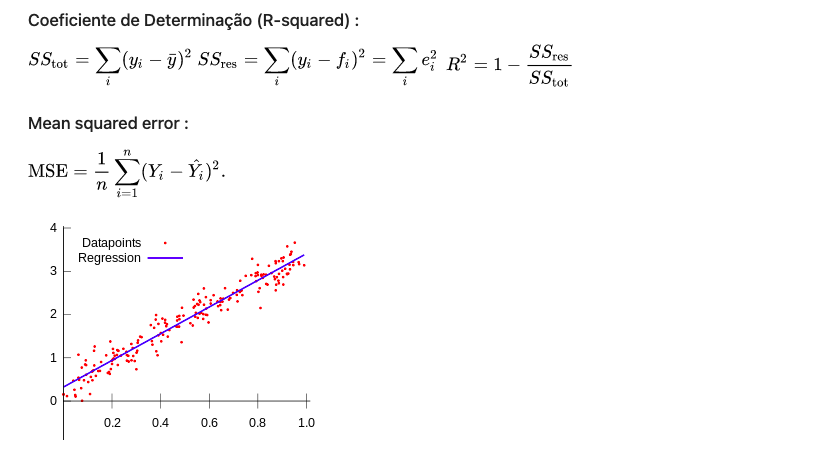

In [22]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


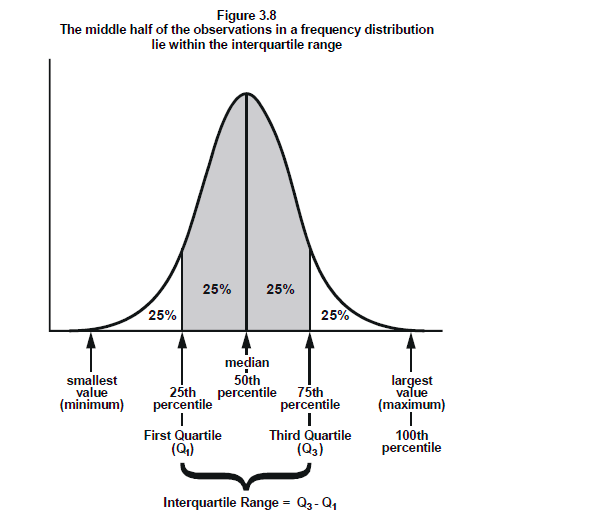

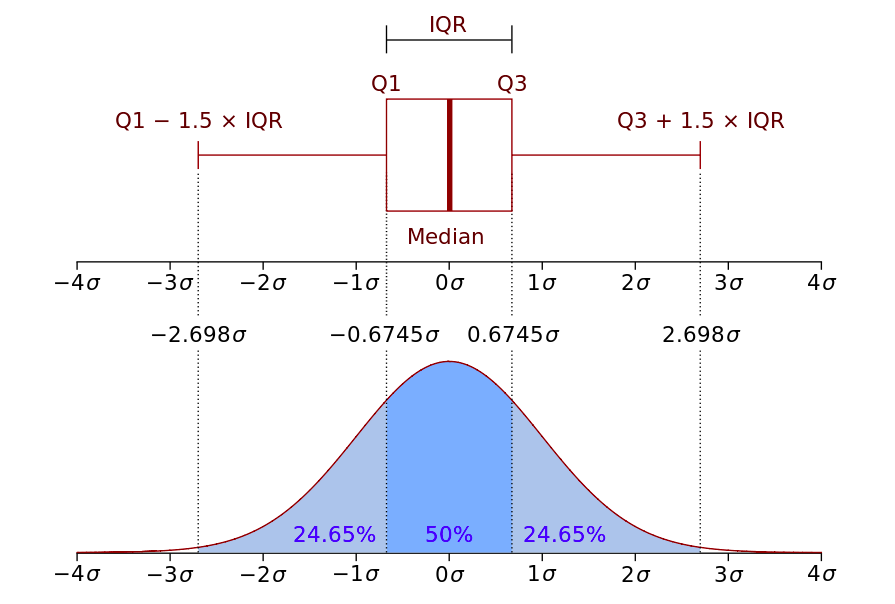

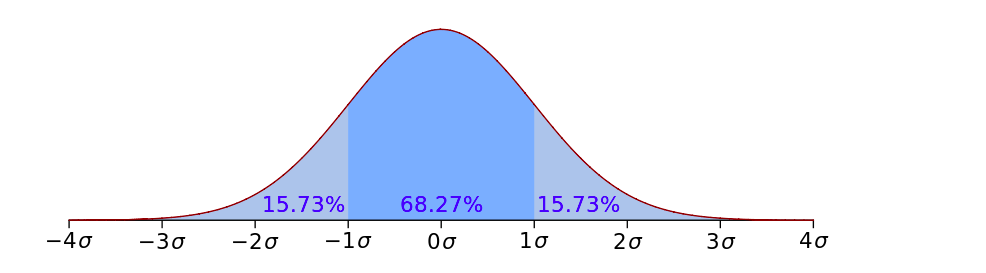

In [23]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


In [24]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.923189943209421  with a P-value of P = 2.447193062825005e-68


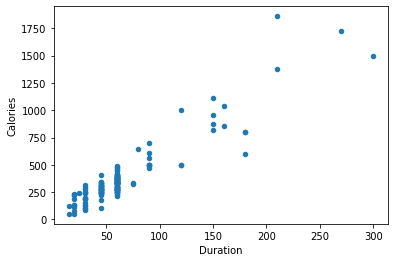

In [25]:
#### Visualizar Duration x Calories 
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr

LinearRegression()

In [28]:
### Definir as Variáveis X e Y 
X = dfClean[['Duration']]
Y = dfClean[['Calories']]

In [29]:
### Acha a reta que melhor descreve a distribuição dos dados 
lr.fit(X,Y)

LinearRegression()

$$
Yhat = a + b  X
$$

In [30]:
a = lr.intercept_
print(a)

[10.20214808]


In [31]:
b= lr.coef_
print(b)

[[5.72035937]]


In [32]:
### Usa o modelo para predição #### 
Yhat = lr.predict(X)
Yhat[0:5]

array([[353.42371042],
       [353.42371042],
       [353.42371042],
       [267.61831984],
       [267.61831984]])

In [33]:
dfClean.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [34]:
### R-squared #####
print('The R-square is: ', lr.score(X, Y))

The R-square is:  0.8522796712430143


In [35]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  10495.78962682487


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

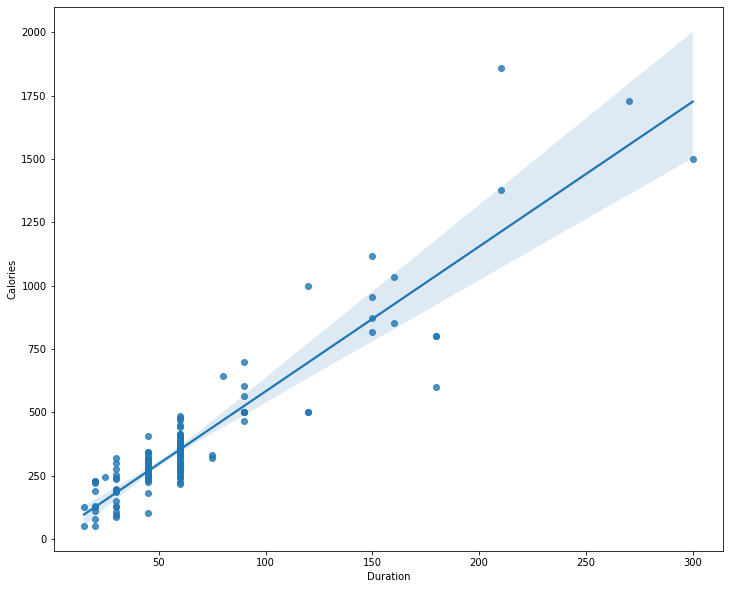

In [37]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=dfClean)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


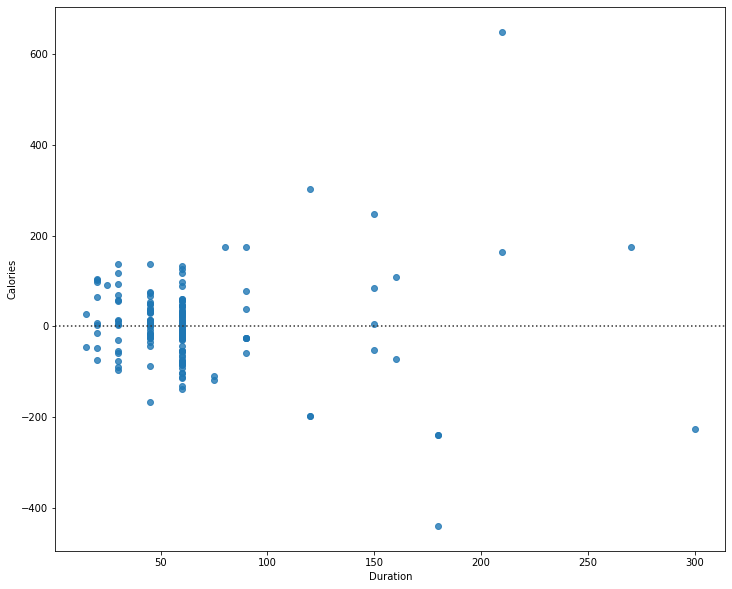

In [38]:
width = 12
height = 10
plt.figure(figsize=(width, height))
x =dfClean['Duration']
y = dfClean['Calories']
sns.residplot(x,y)
plt.show()

<h4>Multiple Linear Regression</h4>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$



$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [39]:
Xm = dfClean[['Duration','Maxpulse']]
Y = dfClean[['Calories']]

In [40]:
lr.fit(Xm,Y)

LinearRegression()

In [41]:
Yhat = lr.predict(Xm)

In [42]:
### R-squared #####
print('The R-square is: ', lr.score(Xm, Y))

The R-square is:  0.8899788742645823


In [43]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

The mean square error of Calories and predicted value is:  7817.194829867199


<h4>Polynomial Regression</h4>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [44]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [45]:
a = np.array([1, 2 ,3]).reshape(-1,1)

In [46]:
a.shape

(3, 1)

In [47]:
p = PolynomialFeatures(degree=3)

In [48]:
p.fit(a)

PolynomialFeatures(degree=3)

In [49]:
p.transform(a)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [50]:
X = dfClean[['Duration','Pulse']]
poly = PolynomialFeatures(degree=2)
X_T = poly.fit_transform(X)
X_T[0:5]


array([[1.0000e+00, 6.0000e+01, 1.1000e+02, 3.6000e+03, 6.6000e+03,
        1.2100e+04],
       [1.0000e+00, 6.0000e+01, 1.1700e+02, 3.6000e+03, 7.0200e+03,
        1.3689e+04],
       [1.0000e+00, 6.0000e+01, 1.0300e+02, 3.6000e+03, 6.1800e+03,
        1.0609e+04],
       [1.0000e+00, 4.5000e+01, 1.0900e+02, 2.0250e+03, 4.9050e+03,
        1.1881e+04],
       [1.0000e+00, 4.5000e+01, 1.1700e+02, 2.0250e+03, 5.2650e+03,
        1.3689e+04]])

In [51]:
Y = dfClean[['Calories']]
lr.fit(X_T,Y)

LinearRegression()

In [52]:
Yhat = lr.predict(X_T)
Yhat[0:5]

array([[364.94475851],
       [393.70134136],
       [339.20380138],
       [263.45339396],
       [287.5469393 ]])

In [53]:
### R-squared #####
print('The R-square is: ', lr.score(X_T, Y))

The R-square is:  0.9037785578859595


### Conjunto Treino e Teste

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

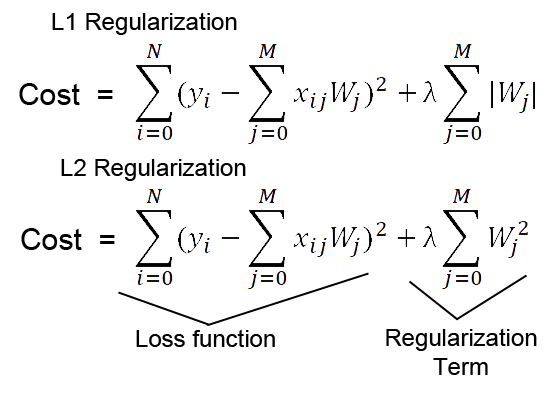

### Overfitting 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.46932e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.74196e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.90054e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


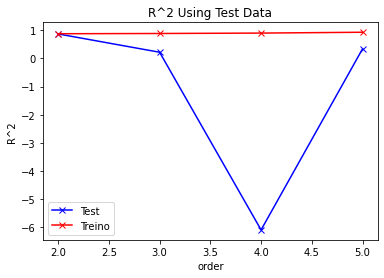

In [56]:
Rsqu_test = []
Rsqu_model =[]

order = [2,3,4,5]
for n in order:
     
    modelPipeline = Pipeline([('poly', PolynomialFeatures(degree=n)),('ridge', Ridge(alpha=0.1))])
    
    modelPipeline.fit(X_train,y_train)
    y_pred = modelPipeline.predict(X_test)
    
 
    Rsqu_test.append(modelPipeline.score(X_test,y_test))
    Rsqu_model.append(modelPipeline.score(X_train, y_train))

   
plt.plot(order, Rsqu_test,'b-x')
plt.plot(order, Rsqu_model,'r-x')
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.legend(('Test', 'Treino'))
